In [1]:
# Este comando descarga el repositorio entero a una carpeta llamada 'TFMDS' en Colab.
#!git clone https://github.com/jmorala/TFMDS.git

# Inicializar directorios
Clonar repositorio github
Posicionarse en el directorio raíz

In [2]:
import os

# Detectar si estamos en Google Colab
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Configurar el directorio de trabajo según el entorno
if IN_COLAB:
    os.chdir('TFMDS')
else:
    # En VS Code local, nos movemos al directorio raíz del proyecto
    # Usa raw string para evitar errores de escape en rutas Windows
    current_dir = r'C:\Users\jmora\Documents\TFMDS'
    os.chdir(current_dir)

# OPCIONAL: Para verificar que estás en la ruta correcta y ver las carpetas
print("Directorio de trabajo actual:", os.getcwd())

Directorio de trabajo actual: C:\Users\jmora\Documents\TFMDS


# Análisis Descriptivo y Estadístico

En una prinera fase se realizan estadísticas resumidas para comprender la distribución y dispersión de los valores sin estructura temporal.
Después se realiza la Visualización y Análisis Específico de Series Temporales


## Lectura de fichero y adaptación de los tipos


In [3]:
import pandas as pd

# Ruta relativa del archivo CSV
RUTA_DATOS = 'datos/STDatosVentasTienda.csv'

# Cargar el archivo en un DataFrame de Pandas
dfSTventas = pd.read_csv(RUTA_DATOS, sep=';',
    parse_dates=['idSecuencia'])

# Convertir la columna anio_mes a período mensual
dfSTventas['anio_mes'] = pd.to_datetime(dfSTventas['anio_mes']).dt.to_period('M')

# Muestra las primeras filas y la información de las columnas para iniciar la exploración
print("Primeras filas del DataFrame:")
print(dfSTventas.head())

print("\nInformación de las columnas y tipos de datos:")
dfSTventas.info()

Primeras filas del DataFrame:
  idSecuencia  producto  udsVenta  bolPromocion  bolOpen  bolHoliday  \
0  2022-11-06         1         0             1        0           1   
1  2022-11-07         1        12             1        1           0   
2  2022-11-08         1        28             1        1           0   
3  2022-11-09         1        14             1        1           0   
4  2022-11-10         1        26             1        1           0   

   udsStock  rotura_stock anio_mes  
0       148         False  2022-11  
1       148         False  2022-11  
2       136         False  2022-11  
3       306         False  2022-11  
4       291         False  2022-11  

Información de las columnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653514 entries, 0 to 653513
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   idSecuencia   653514 non-null  datetime64[ns]
 1   

## Análisis descriptivo

### Análisis de unidades de venta de todos los productos


Estadísticas descriptivas de udsVenta:
count    653514.000000
mean          1.475795
std           2.698672
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         181.000000
Name: udsVenta, dtype: float64

Número de días con tienda cerrada: 109068 Proporción: 0.16689466484268126

 SE QUITAN LOS DÍAS QUE LA TIENDA ESTÁ CERRADA

Estadísticas descriptivas de udsVenta:
count    544446.000000
mean          1.724792
std           2.850745
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         181.000000
Name: udsVenta, dtype: float64

Estadísticas descriptivas de idSecuencia:
count                           544446
mean     2023-11-05 12:34:17.142856704
min                2022-11-07 00:00:00
25%                2023-05-06 00:00:00
50%                2023-11-07 00:00:00
75%                2024-05-07 00:00:00
max                2024-11-05 00:00:00
Name: idSecuencia, dtype: object


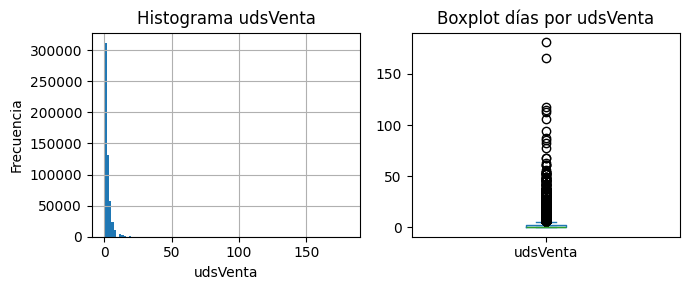

<Axes: xlabel='idSecuencia', ylabel='udsVenta'>

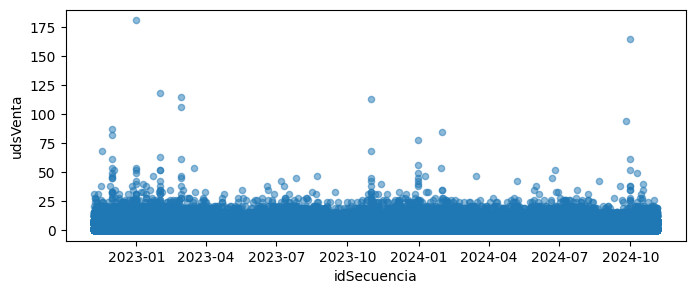

In [4]:
import matplotlib.pyplot as plt

print("\nEstadísticas descriptivas de udsVenta:")
print(dfSTventas.udsVenta.describe())
print(f'\nNúmero de días con tienda cerrada: {(dfSTventas['bolOpen'] == 0).sum()} Proporción: {(dfSTventas['bolOpen'] == 0).sum()/len(dfSTventas)}')

# Eliminar los datos de los días de tienda cerrada para que no interfieran en el análisis
dfSTventas = dfSTventas[dfSTventas['bolOpen'] != 0]

print("\n SE QUITAN LOS DÍAS QUE LA TIENDA ESTÁ CERRADA")
print("\nEstadísticas descriptivas de udsVenta:")
print(dfSTventas.udsVenta.describe())
print("\nEstadísticas descriptivas de idSecuencia:")
print(dfSTventas.idSecuencia.describe())

fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# Histograma
dfSTventas.udsVenta.hist(bins=100, ax=axes[0])
axes[0].set_title('Histograma udsVenta')
axes[0].set_xlabel('udsVenta')
axes[0].set_ylabel('Frecuencia')

# Boxplot
dfSTventas.udsVenta.plot.box(ax=axes[1])
axes[1].set_title('Boxplot días por udsVenta')

plt.tight_layout()
plt.show()

# Ventas
dfSTventas.plot(kind='scatter', x='idSecuencia', y='udsVenta', alpha=0.5, figsize=(8, 3))

Analizar las ventas totales diarias (suma de las ventas de todos los productos de un día)


Estadísticas descriptivas de udsVenta por dia:
count     609.000000
mean     1541.963875
std       323.621025
min        33.000000
25%      1391.000000
50%      1544.000000
75%      1710.000000
max      2565.000000
Name: udsVenta, dtype: float64





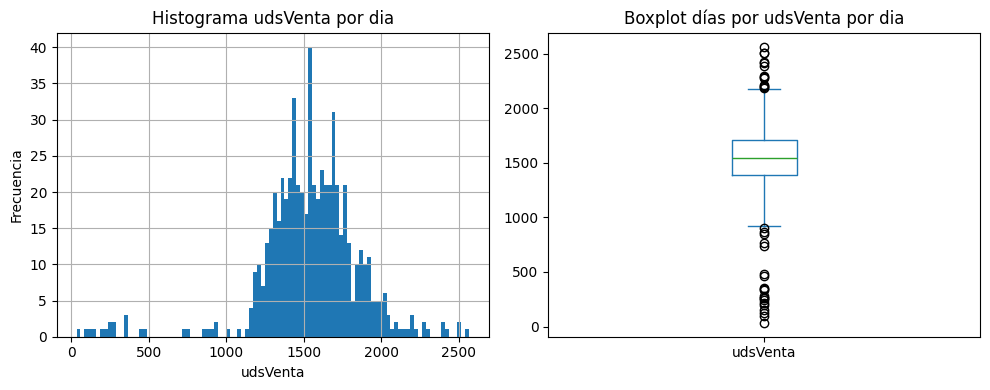

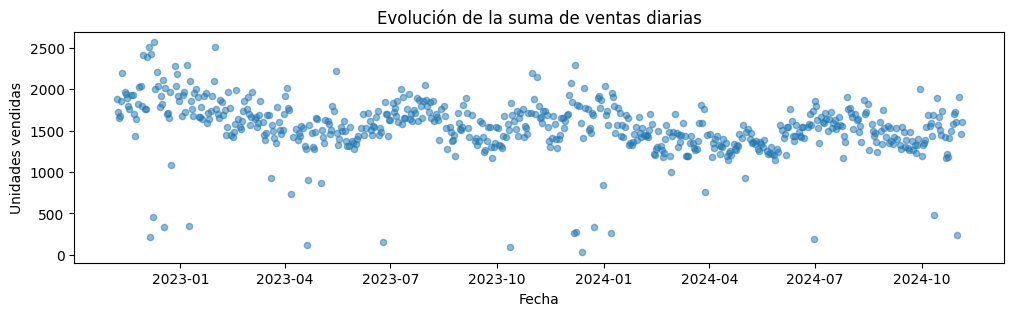

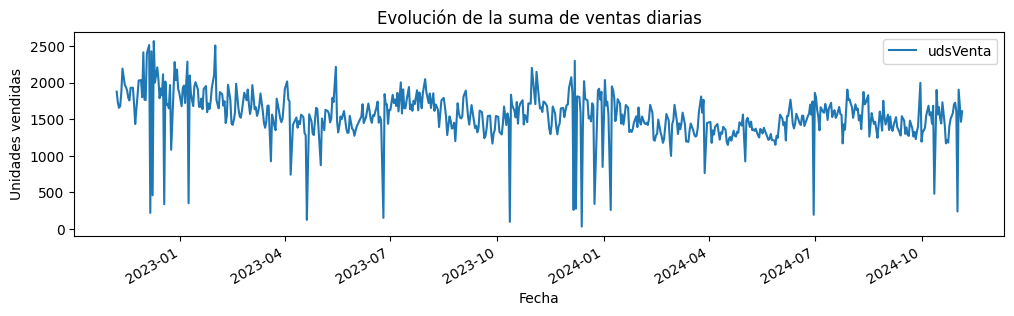

In [5]:
# Crear dataframe con la suma de ventas diaria
dfSTventasPorDia = dfSTventas.groupby('idSecuencia').agg({'udsVenta': 'sum', 'bolHoliday': 'min'}).reset_index()

print("\nEstadísticas descriptivas de udsVenta por dia:")
print(dfSTventasPorDia.udsVenta.describe())
print("\n\n")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histograma
dfSTventasPorDia.udsVenta.hist(bins=100, ax=axes[0])
axes[0].set_title('Histograma udsVenta por dia')
axes[0].set_xlabel('udsVenta')
axes[0].set_ylabel('Frecuencia')

# Boxplot
dfSTventasPorDia.udsVenta.plot.box(ax=axes[1])
axes[1].set_title('Boxplot días por udsVenta por dia')
plt.tight_layout()
plt.show()

# Ventas
dfSTventasPorDia.plot(kind='scatter', x='idSecuencia', y='udsVenta', alpha=0.5, figsize=(12, 3))
plt.title('Evolución de la suma de ventas diarias')
plt.xlabel('Fecha')
plt.ylabel('Unidades vendidas')
plt.show()

# Gráfico de la suma de ventas diarias, evolución cronológica
dfSTventasPorDia.plot(x='idSecuencia', y='udsVenta', figsize=(12, 3))
plt.title('Evolución de la suma de ventas diarias')
plt.xlabel('Fecha')
plt.ylabel('Unidades vendidas')
plt.show()


In [6]:
# Mostrar los días con menos ventas
dfSTventasPorDia.nsmallest(10, 'udsVenta')

,idSecuencia,udsVenta,bolHoliday
335,2023-12-13,33,0
283,2023-10-12,97,1
139,2023-04-20,125,0
192,2023-06-25,152,1
500,2024-06-30,194,1
25,2022-12-06,220,1
605,2024-11-01,239,1
355,2024-01-07,259,1
329,2023-12-06,261,1
331,2023-12-08,278,1


In [7]:
# Mostrar los días con mas ventas
dfSTventasPorDia.nlargest(10, 'udsVenta')

,idSecuencia,udsVenta,bolHoliday
28,2022-12-09,2565,0
24,2022-12-05,2511,0
73,2023-01-31,2506,0
26,2022-12-07,2426,0
20,2022-11-30,2412,0
23,2022-12-03,2392,0
330,2023-12-07,2296,0
52,2023-01-07,2285,0
43,2022-12-27,2279,0
159,2023-05-15,2214,0


Revisión valores atípicos

In [8]:
# Revisar las filas con los diez valores máximos de udsVenta
print("\nFilas con los diez valores máximos de udsVenta:")
dfSTventas.nlargest(10, 'udsVenta')


Filas con los diez valores máximos de udsVenta:


,idSecuencia,producto,udsVenta,bolPromocion,bolOpen,bolHoliday,udsStock,rotura_stock,anio_mes
435000,2022-12-31,669,181,0,1,0,49,False,2022-12
435639,2024-09-30,669,165,0,1,0,96,False,2024-09
435031,2023-01-31,669,118,0,1,0,7,False,2023-01
435059,2023-02-28,669,115,0,1,0,113,False,2023-02
435304,2023-10-31,669,113,0,1,0,0,False,2023-10
152162,2023-02-28,228,106,0,1,0,82,False,2023-02
520430,2024-09-25,800,94,0,1,0,188,False,2024-09
434969,2022-11-30,669,87,0,1,0,75,False,2022-11
233640,2024-01-31,358,85,0,1,0,21,False,2024-01
152072,2022-11-30,228,82,0,1,0,66,False,2022-11


Hay dos valores atípicos que resaltan más..... Pero son del mismo producto, puede que sea lógico..

Revisión del la evolución de ventas totales, acumulado por mes

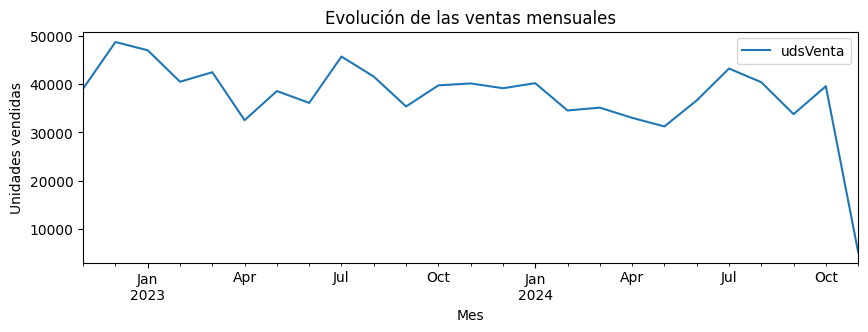

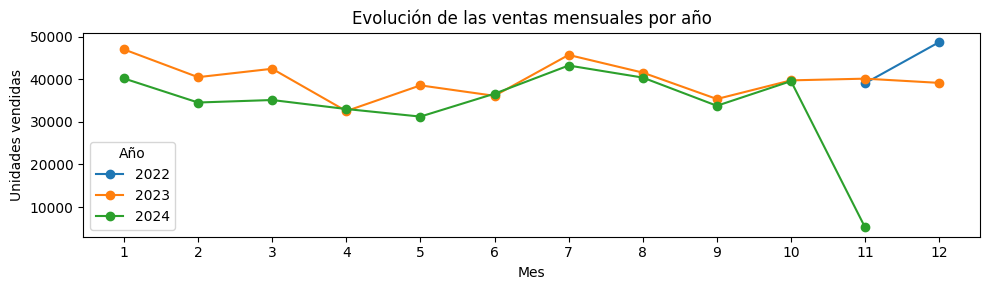

In [9]:
# Crear dataframe con ventas acumuladas por mes
dfSTventasPorMes = dfSTventas.groupby('anio_mes').agg({'udsVenta': 'sum'}).reset_index()

# Gráfico de ventas acumuladas por mes
dfSTventasPorMes.plot(x='anio_mes', y='udsVenta', figsize=(10, 3))
plt.title('Evolución de las ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Unidades vendidas')
plt.show()

# Crear un dataframe con las ventas acumuladas por mes con una columna para cada año
dfSTventasPorMesAnios = dfSTventas.copy()
dfSTventasPorMesAnios['anio'] = dfSTventasPorMesAnios['idSecuencia'].dt.year
dfSTventasPorMesAnios['mes'] = dfSTventasPorMesAnios['idSecuencia'].dt.month
dfSTventasPorMesAnios = dfSTventasPorMesAnios.groupby(['anio', 'mes']).agg({'udsVenta': 'sum'}).reset_index()

# Pivotar para tener una columna por año
pivot = dfSTventasPorMesAnios.pivot(index='mes', columns='anio', values='udsVenta')

# Asegurar que el índice de meses esté ordenado del 1 al 12 (los meses sin datos quedan como NaN)
pivot = pivot.reindex(range(1, 13))

# Graficar: cada columna (año) será una línea
pivot.plot(marker='o', figsize=(10, 3))
plt.title('Evolución de las ventas mensuales por año')
plt.xlabel('Mes')
plt.ylabel('Unidades vendidas')
plt.xticks(range(1, 13))
plt.legend(title='Año')
plt.tight_layout()
plt.show()

Lo mismo que se ha hecho para los meses pero para las semanas

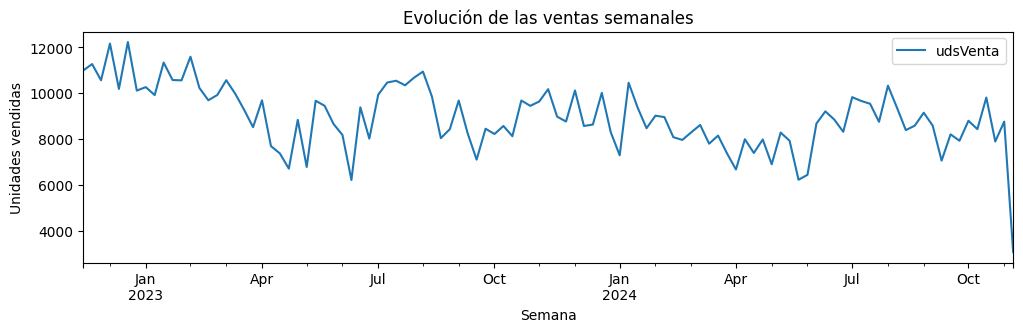

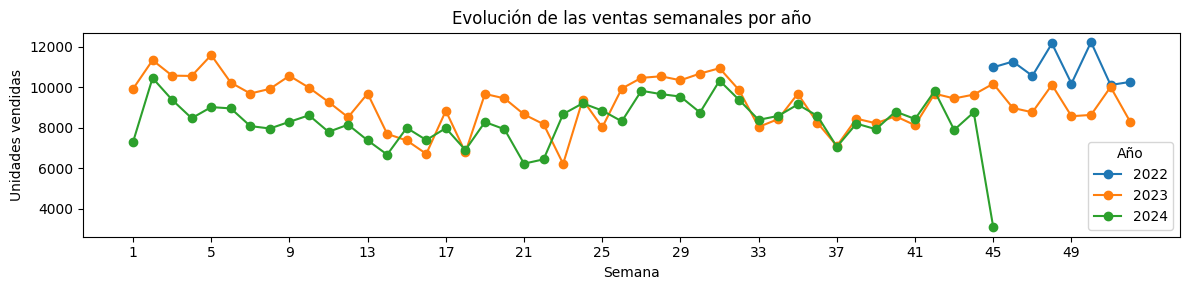

In [10]:
# Crear datafranme con ventas acumuladas por semana
dfSTventasPorSemana = dfSTventas.set_index('idSecuencia').resample('W').agg({'udsVenta': 'sum'}).reset_index()

# Gráfico de ventas acumuladas por semana
dfSTventasPorSemana.plot(x='idSecuencia', y='udsVenta', figsize=(12, 3))
plt.title('Evolución de las ventas semanales')
plt.xlabel('Semana')
plt.ylabel('Unidades vendidas')
plt.show()

# Crear un dataframe con las ventas acumuladas por semana con una columna para cada año
dfSTventasPorSemanaAnios = dfSTventas.copy()
dfSTventasPorSemanaAnios['anio'] = dfSTventasPorSemanaAnios['idSecuencia'].dt.year
dfSTventasPorSemanaAnios['semana'] = dfSTventasPorSemanaAnios['idSecuencia'].dt.isocalendar().week
dfSTventasPorSemanaAnios = dfSTventasPorSemanaAnios.groupby(['anio', 'semana']).agg({'udsVenta': 'sum'}).reset_index()

# Pivotar para tener una columna por año
pivot = dfSTventasPorSemanaAnios.pivot(index='semana', columns='anio', values='udsVenta')

# Asegurar que el índice de semanas esté ordenado del 1 al 52
pivot = pivot.reindex(range(1, 53))

# Graficar: cada columna (año) será una línea
pivot.plot(marker='o', figsize=(12, 3))
plt.title('Evolución de las ventas semanales por año')
plt.xlabel('Semana')
plt.ylabel('Unidades vendidas')
plt.xticks(range(1, 53, 4))
plt.legend(title='Año')
plt.tight_layout()
plt.show()

Lo mismo para los días del año

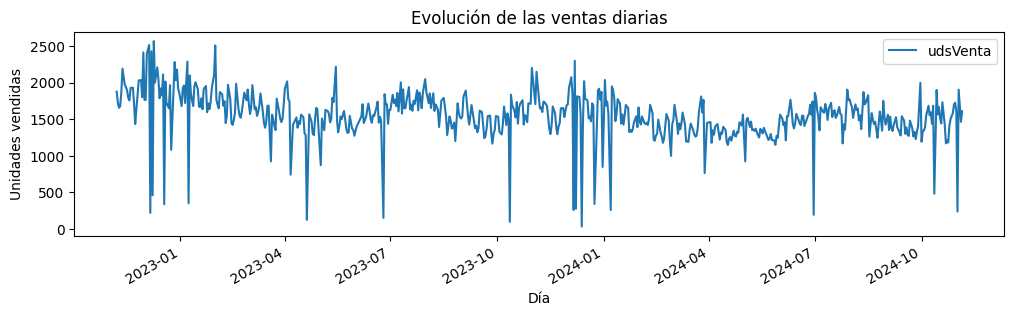

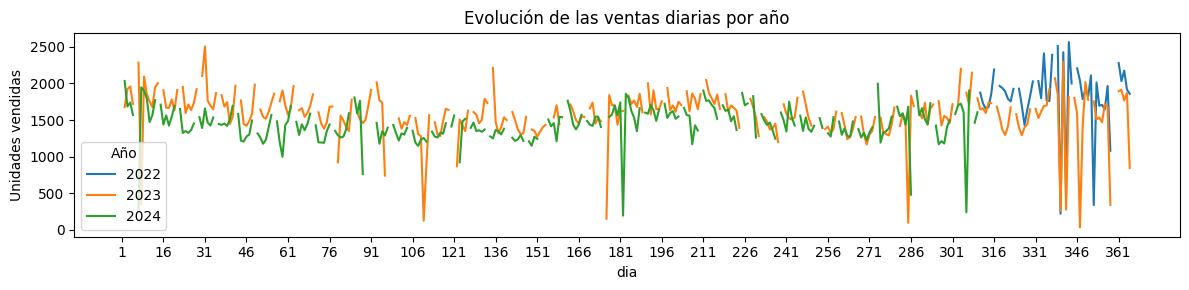

In [11]:

# Gráfico de ventas acumuladas por semana
dfSTventasPorDia.plot(x='idSecuencia', y='udsVenta', figsize=(12, 3))
plt.title('Evolución de las ventas diarias')
plt.xlabel('Día')
plt.ylabel('Unidades vendidas')
plt.show()

# Crear un dataframe con las ventas acumuladas por día con una columna para cada año
dfSTventasPorDiaAnios = dfSTventas.copy()
dfSTventasPorDiaAnios['anio'] = dfSTventasPorDiaAnios['idSecuencia'].dt.year
dfSTventasPorDiaAnios['dia'] = dfSTventasPorDiaAnios['idSecuencia'].dt.dayofyear.astype(int)
dfSTventasPorDiaAnios = dfSTventasPorDiaAnios.groupby(['anio', 'dia']).agg({'udsVenta': 'sum'}).reset_index()

# Pivotar para tener una columna por día
pivot = dfSTventasPorDiaAnios.pivot(index='dia', columns='anio', values='udsVenta')

# Asegurar que el índice de semanas esté ordenado del 1 al 367
pivot = pivot.reindex(range(1,367))

# Graficar: cada columna (año) será una línea
pivot.plot(figsize=(12, 3))
plt.title('Evolución de las ventas diarias por año')
plt.xlabel('dia')
plt.ylabel('Unidades vendidas')
plt.xticks(range(1, 367, 15))
plt.legend(title='Año')
plt.tight_layout()
plt.show()

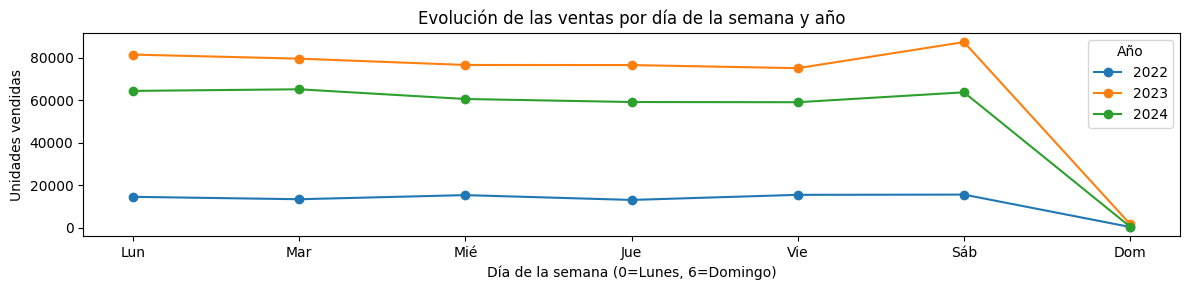

In [12]:
# Crear gráfico tipo plot con eje x los días de la semana y una línea por año, ordenado de lunes a domingo
dfSTventasPorDiaSemanaAnios = dfSTventas.copy()
dfSTventasPorDiaSemanaAnios['anio'] = dfSTventasPorDiaSemanaAnios['idSecuencia'].dt.year
dfSTventasPorDiaSemanaAnios['dia_semana'] = dfSTventasPorDiaSemanaAnios['idSecuencia'].dt.dayofweek  # Lunes=0, Domingo=6
# Agrupar por año y día de la semana
dfSTventasPorDiaSemanaAnios = dfSTventasPorDiaSemanaAnios.groupby(['anio', 'dia_semana']).agg({'udsVenta': 'sum'}).reset_index()
# Pivotar para tener una columna por año
pivot = dfSTventasPorDiaSemanaAnios.pivot(index='dia_semana', columns='anio', values='udsVenta')
# Graficar: cada columna (año) será una línea
pivot.plot(marker='o', figsize=(12, 3))
plt.title('Evolución de las ventas por día de la semana y año')
plt.xlabel('Día de la semana (0=Lunes, 6=Domingo)')
plt.ylabel('Unidades vendidas')
plt.xticks(range(0, 7), ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
plt.legend(title='Año')
plt.tight_layout()
plt.show()


Analisis con gráfico heatmap

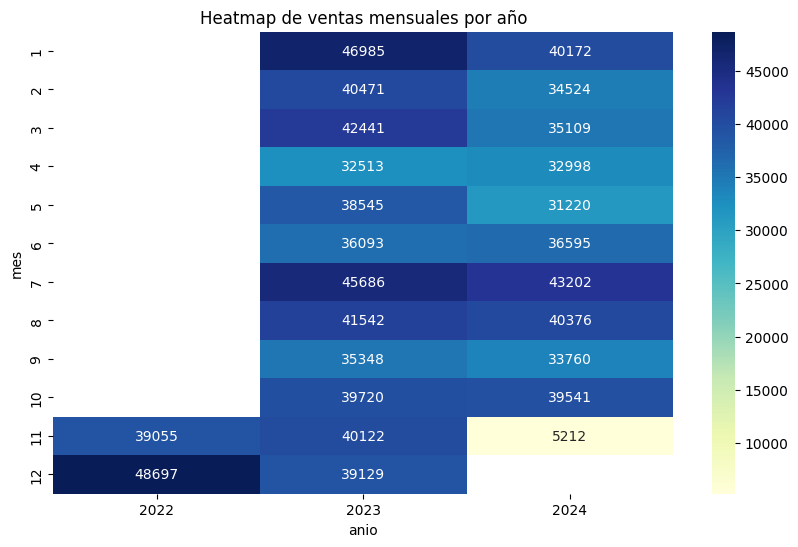

In [13]:
# Gráfico heatmap con el eje y los meses y eje x los años
import seaborn as sns
# Crear tabla pivote con meses como filas, años como columnas y suma de udsVenta como valores
pivot = dfSTventasPorMesAnios.pivot(index='mes', columns='anio', values='udsVenta')
# Gráfico heatmap con el eje y los meses y ejex los años
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap de ventas mensuales por año')
plt.show()

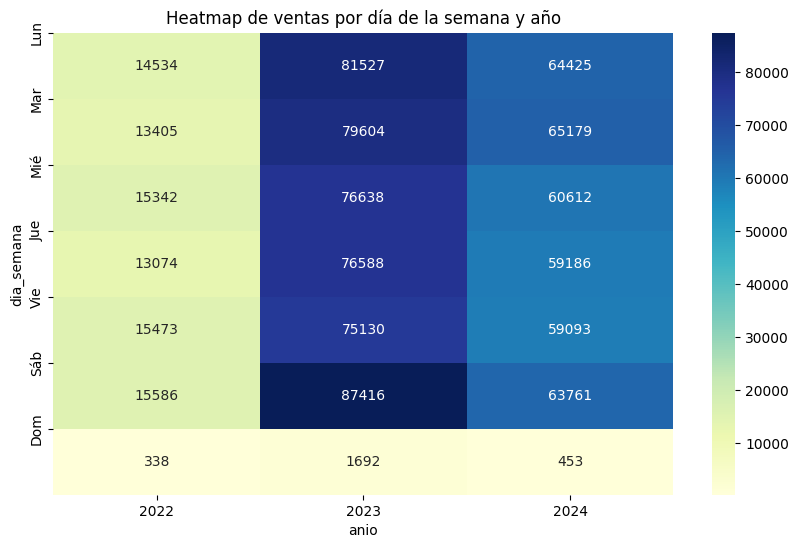

In [14]:
# Gráfico heatmap con el eje y los días de la semana y eje x los años

# Crear tabla pivote con días de la semana como filas, años como columnas y suma de udsVenta como valores
pivot = dfSTventasPorDiaSemanaAnios.pivot(index='dia_semana', columns='anio', values='udsVenta')
# Gráfico heatmap con el eje y los días de la semana y eje x los años
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap de ventas por día de la semana y año')
plt.yticks(range(0, 7), ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
plt.show()

### Análisis de las características de la serie temporal de ventas

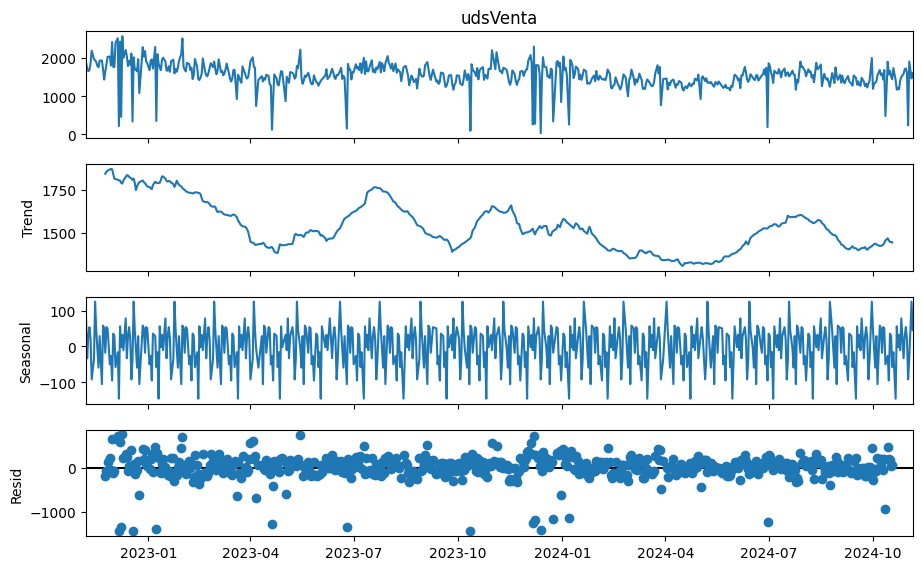

In [15]:
import statsmodels.api as sm
# Análisis de descomposición estacional de la serie temporal de ventas diarias asumiento aditivo y periodo mensual (30 días)
descomposicion = sm.tsa.seasonal_decompose(dfSTventasPorDia.set_index('idSecuencia')['udsVenta'], model='additive', period=30)
fig = descomposicion.plot()
fig.set_size_inches(10, 6)
plt.show()


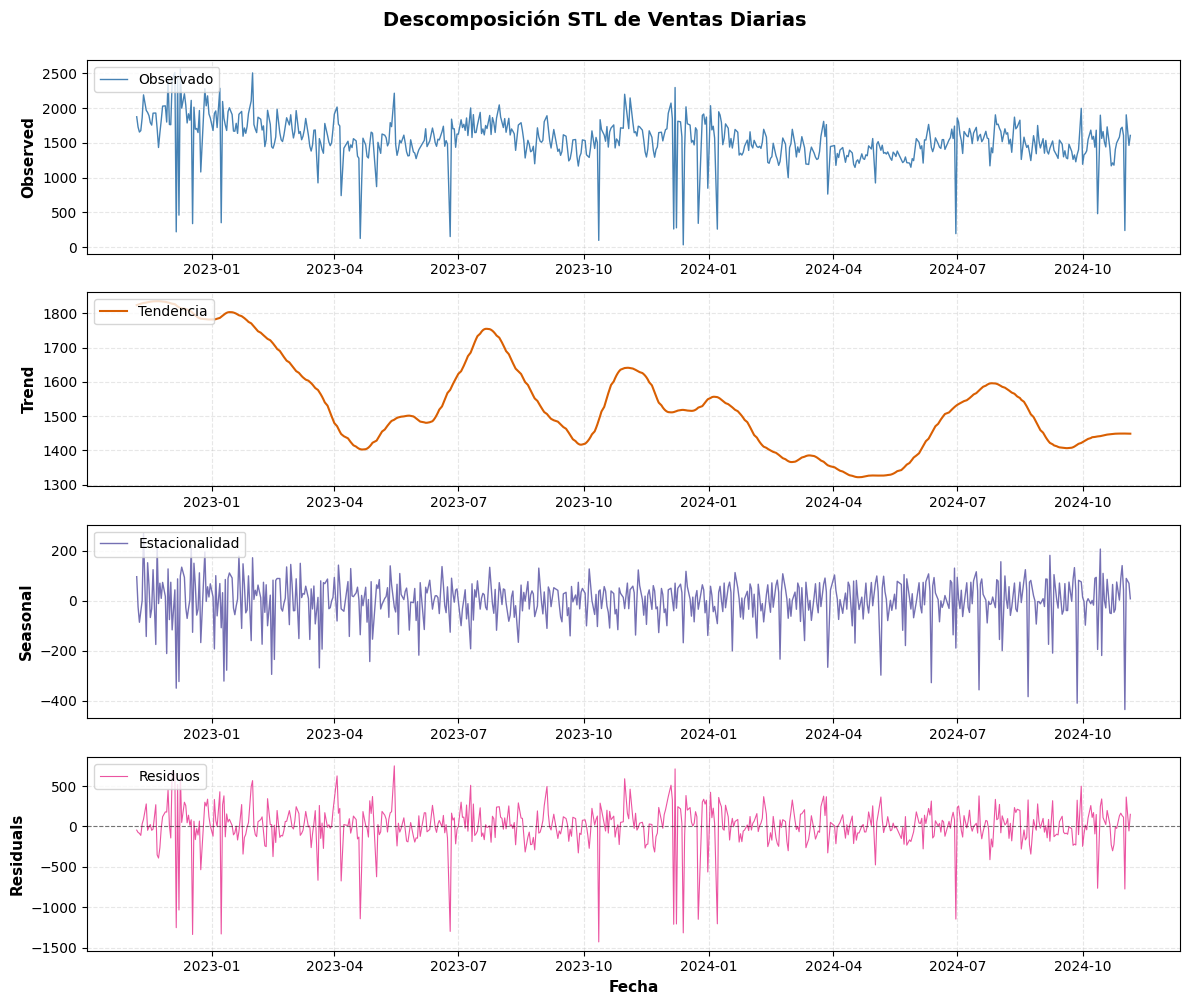

ESTADÍSTICAS DE LA DESCOMPOSICIÓN STL

Estadísticas de los residuos:
count     609.000000
mean        0.100031
std       268.076914
min     -1428.922497
25%       -95.381769
50%        11.869833
75%       129.094081
max       749.648997
Name: resid, dtype: float64

Varianza explicada por tendencia: 19.34%
Varianza explicada por estacionalidad: 8.04%
Varianza de residuos: 68.62%


In [16]:
# Análisis STL (Seasonal and Trend decomposition using Loess) - Método más robusto
from statsmodels.tsa.seasonal import STL

# Aplicar STL a las ventas diarias con periodo de 30 días (aproximadamente 1 mes)
stl_result = STL(dfSTventasPorDia.set_index('idSecuencia')['udsVenta'], period=30, seasonal=31).fit()

# Crear figura con los 4 componentes
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

# Gráfico 1: Serie original (Observed)
axes[0].plot(stl_result.observed, label='Observado', color='steelblue', linewidth=1)
axes[0].set_ylabel('Observed', fontsize=11, fontweight='bold')
axes[0].legend(loc='upper left', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')

# Gráfico 2: Tendencia (Trend)
axes[1].plot(stl_result.trend, label='Tendencia', color='#d95f02', linewidth=1.5)
axes[1].set_ylabel('Trend', fontsize=11, fontweight='bold')
axes[1].legend(loc='upper left', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')

# Gráfico 3: Estacionalidad (Seasonal)
axes[2].plot(stl_result.seasonal, label='Estacionalidad', color='#7570b3', linewidth=1)
axes[2].set_ylabel('Seasonal', fontsize=11, fontweight='bold')
axes[2].legend(loc='upper left', fontsize=10)
axes[2].grid(True, alpha=0.3, linestyle='--')

# Gráfico 4: Residuos (Residuals)
axes[3].plot(stl_result.resid, label='Residuos', color='#e7298a', linewidth=0.8, alpha=0.8)
axes[3].axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
axes[3].set_ylabel('Residuals', fontsize=11, fontweight='bold')
axes[3].set_xlabel('Fecha', fontsize=11, fontweight='bold')
axes[3].legend(loc='upper left', fontsize=10)
axes[3].grid(True, alpha=0.3, linestyle='--')

plt.suptitle('Descomposición STL de Ventas Diarias', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Estadísticas del residuo
print("=" * 80)
print("ESTADÍSTICAS DE LA DESCOMPOSICIÓN STL")
print("=" * 80)
print("\nEstadísticas de los residuos:")
print(stl_result.resid.describe())
print(f"\nVarianza explicada por tendencia: {stl_result.trend.var() / stl_result.observed.var() * 100:.2f}%")
print(f"Varianza explicada por estacionalidad: {stl_result.seasonal.var() / stl_result.observed.var() * 100:.2f}%")
print(f"Varianza de residuos: {stl_result.resid.var() / stl_result.observed.var() * 100:.2f}%")


### Análisis de unidades de venta por producto

In [17]:
# Número de productos únicos
dfSTventasPorProducto = (dfSTventas.groupby('producto').agg({'udsVenta': 'sum'}).sort_values('udsVenta', ascending=False).reset_index())
# describe dfSTventasPorProducto
print("\nDescripción de unidades vendidas por producto:")
print(dfSTventasPorProducto.udsVenta.describe())


Descripción de unidades vendidas por producto:
count     894.000000
mean     1050.398210
std       743.498502
min       104.000000
25%       572.250000
50%       843.500000
75%      1295.000000
max      6391.000000
Name: udsVenta, dtype: float64


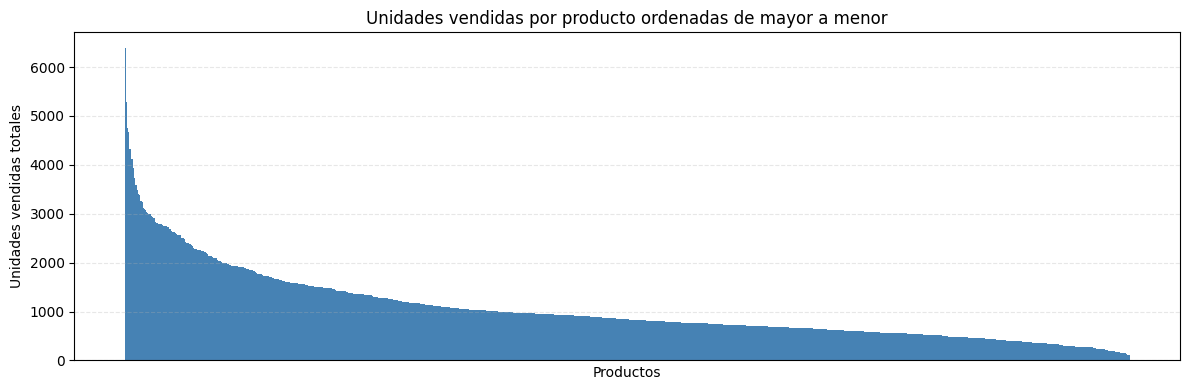

In [18]:
# gráfico de ventas totales por producto
plt.figure(figsize=(12, 4))
plt.bar(range(len(dfSTventasPorProducto)),
        dfSTventasPorProducto['udsVenta'],
        width=1.0,
        color='steelblue',
        edgecolor='none')

plt.title('Unidades vendidas por producto ordenadas de mayor a menor', fontsize=12)
plt.xlabel('Productos')
plt.ylabel('Unidades vendidas totales')
plt.xticks([])
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()



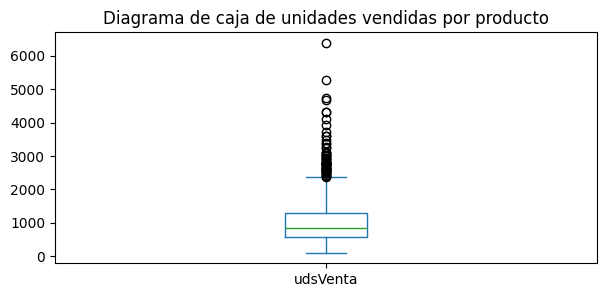

In [19]:
# Box plot tipo violin de unidades vendidas por producto

dfSTventasPorProducto.udsVenta.plot.box(figsize=(7, 3))
plt.title('Diagrama de caja de unidades vendidas por producto')
plt.show()


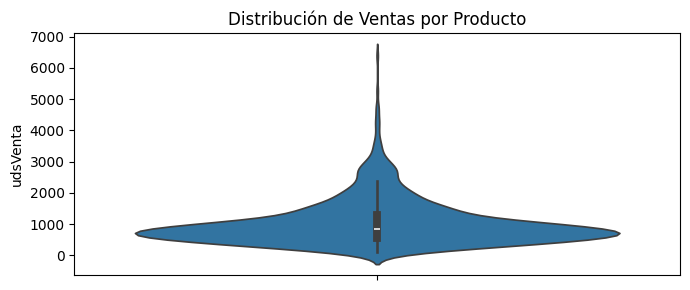

In [20]:
import seaborn as sns
plt.figure(figsize=(7, 3))
sns.violinplot(
    data=dfSTventasPorProducto.udsVenta,
    inner='box',         # Mostrar boxplot dentro: 'box', 'quartile', 'point', None
    density_norm='width'        # 'width', 'area', 'count'
)
plt.xticks(rotation=45)
plt.title('Distribución de Ventas por Producto')
plt.tight_layout()
plt.show()

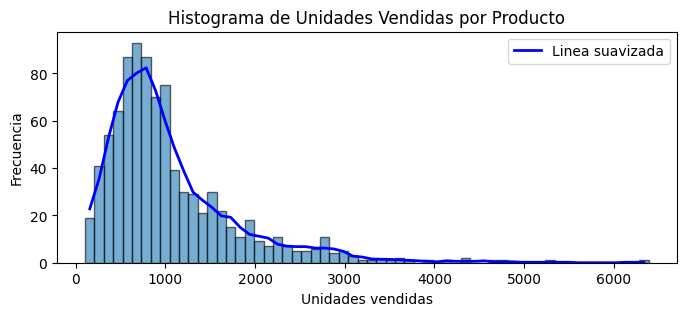

In [21]:
# histograma de unidades vendidas por producto con línea que simula el histograma

import numpy as np

plt.figure(figsize=(8, 3))
counts, bins, patches = plt.hist(dfSTventasPorProducto.udsVenta, bins=60, edgecolor='black', alpha=0.6)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Línea suavizada (media móvil) para una curva más limpia
smooth = np.convolve(counts, np.ones(5) / 5, mode='same')
plt.plot(bin_centers, smooth, color='blue', lw=2, label='Linea suavizada')

plt.title('Histograma de Unidades Vendidas por Producto')
plt.xlabel('Unidades vendidas')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [22]:
# Listar los productos con más ventas
dfSTventasPorProducto.nlargest(10, 'udsVenta')

,producto,udsVenta
0,1,6391
1,2,5276
2,78,4746
3,9,4675
4,13,4326
5,7,4324
6,15,4115
7,391,3937
8,3,3730
9,150,3593


In [23]:
# Listar los productos con menos ventas
dfSTventasPorProducto.nsmallest(10, 'udsVenta')

,producto,udsVenta
893,745,104
892,422,107
891,832,127
889,958,149
890,720,149
888,350,153
887,913,160
886,941,161
885,515,162
884,815,163


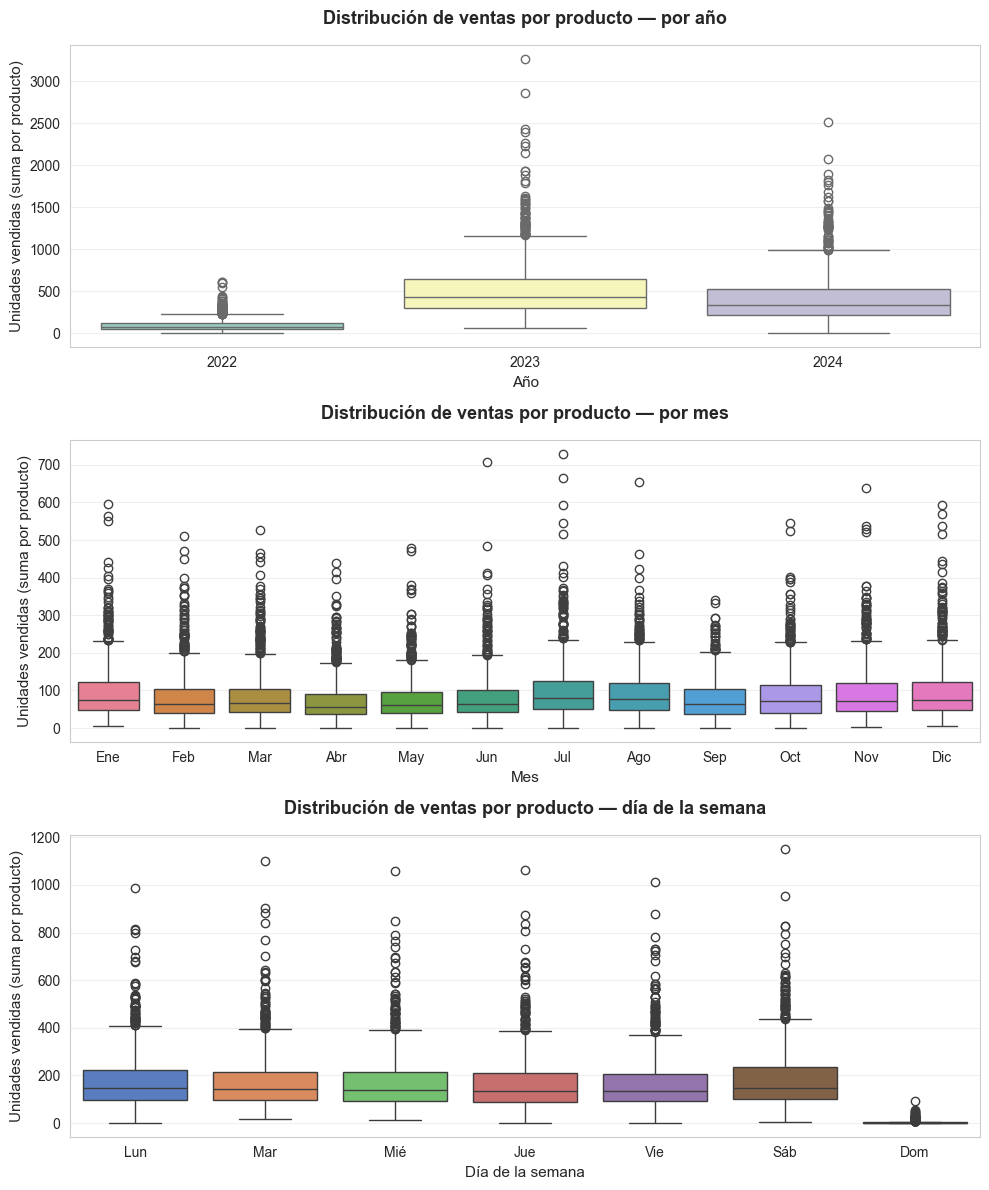

In [24]:
# Boxplots de la suma de ventas por producto: por año, por mes y por día de la semana

df_box = dfSTventas.copy()

# Añadir columnas de periodo
df_box['anio'] = df_box['idSecuencia'].dt.year
df_box['mes'] = df_box['idSecuencia'].dt.month
mes_labels = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']

df_box['dow'] = df_box['idSecuencia'].dt.dayofweek
dow_labels = ['Lun','Mar','Mié','Jue','Vie','Sáb','Dom']

# Agregar: suma de ventas por (periodo, producto)
df_year_prod = df_box.groupby(['anio','producto'], as_index=False).agg({'udsVenta':'sum'})
df_month_prod = df_box.groupby(['mes','producto'], as_index=False).agg({'udsVenta':'sum'})
df_dow_prod = df_box.groupby(['dow','producto'], as_index=False).agg({'udsVenta':'sum'})

import matplotlib.pyplot as plt
import seaborn as sns


# Configurar estilo
sns.set_style("whitegrid")
palette_year = ['#8dd3c7', '#ffffb3', '#bebada']
palette_month = sns.color_palette("husl", 12)
palette_dow = sns.color_palette("muted", 7)

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# 1) Boxplot por año
sns.boxplot(
    x='anio', y='udsVenta', data=df_year_prod,
    hue='anio', palette=palette_year, legend=False,
    ax=axes[0]
)
axes[0].set_title('Distribución de ventas por producto — por año',
                  fontsize=13, fontweight='bold', pad=15)
axes[0].set_xlabel('Año', fontsize=11)
axes[0].set_ylabel('Unidades vendidas (suma por producto)', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# 2) Boxplot por mes
order_months = list(range(1, 13))
sns.boxplot(
    x='mes', y='udsVenta', data=df_month_prod,
    order=order_months, hue='mes', palette=palette_month, legend=False,
    ax=axes[1]
)
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(mes_labels)
axes[1].set_title('Distribución de ventas por producto — por mes',
                  fontsize=13, fontweight='bold', pad=15)
axes[1].set_xlabel('Mes', fontsize=11)
axes[1].set_ylabel('Unidades vendidas (suma por producto)', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

# 3) Boxplot por día de la semana
order_dow = list(range(0, 7))
sns.boxplot(
    x='dow', y='udsVenta', data=df_dow_prod,
    order=order_dow, hue='dow', palette=palette_dow, legend=False,
    ax=axes[2]
)
axes[2].set_xticks(range(7))
axes[2].set_xticklabels(dow_labels)
axes[2].set_title('Distribución de ventas por producto — día de la semana',
                  fontsize=13, fontweight='bold', pad=15)
axes[2].set_xlabel('Día de la semana', fontsize=11)
axes[2].set_ylabel('Unidades vendidas (suma por producto)', fontsize=11)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Análisis de la serie

### Análisis Lag y autocorrelación

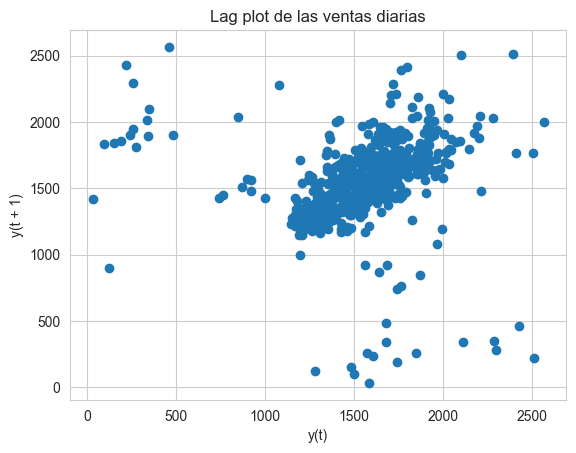

In [25]:
from pandas.plotting import lag_plot

lag_plot(dfSTventasPorDia.udsVenta)
plt.title('Lag plot de las ventas diarias')
plt.show()


Se observa una nube diagonal central pero dispersa, entre más o menos 1100 y 2000, pero no hay una correlación fuerte

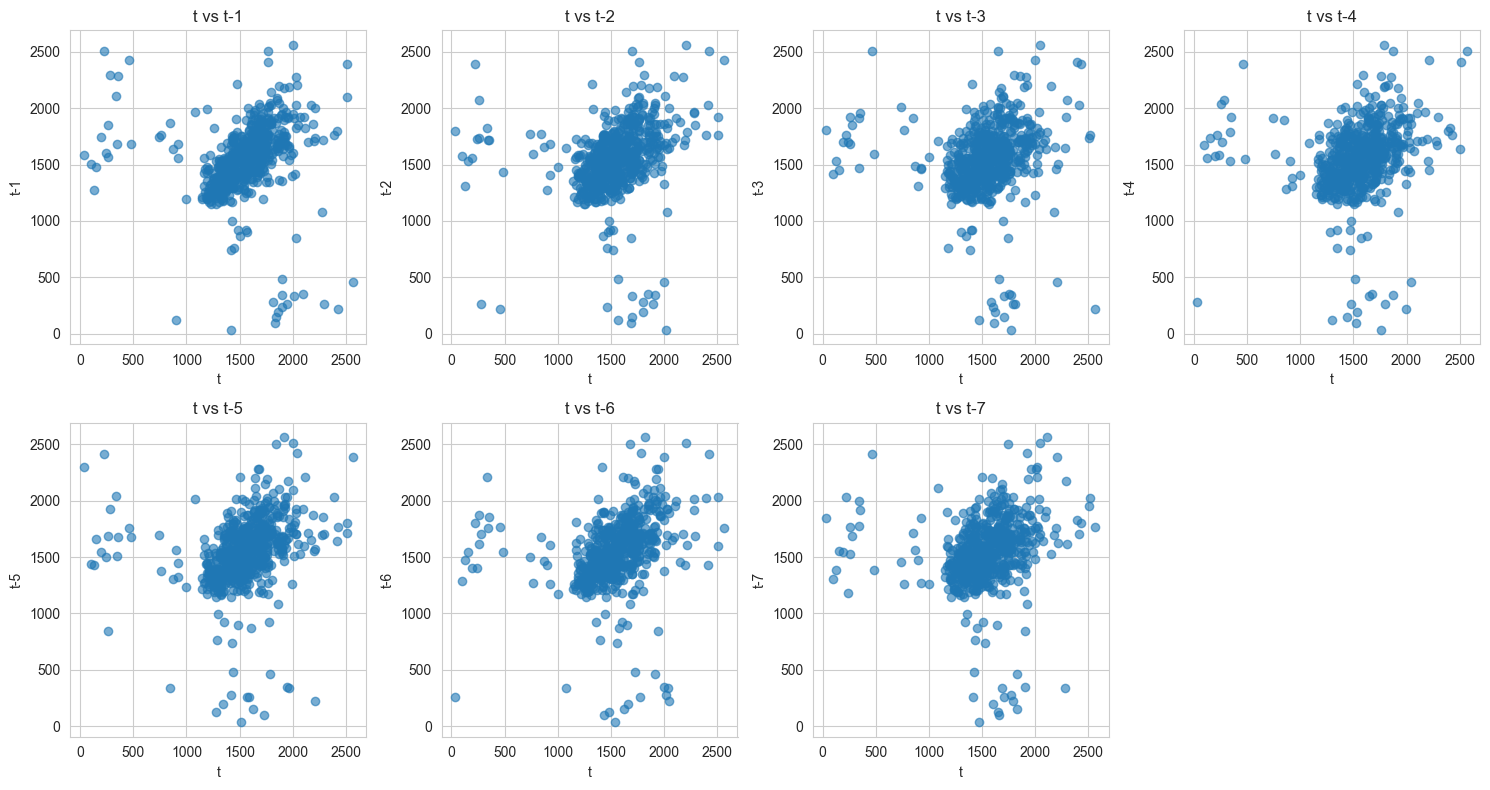

In [26]:
import matplotlib.pyplot as plt
from pandas import concat

# Parámetros
values = dfSTventasPorDia.udsVenta
lags = 7

# Crear dataframe con lags
columns = [values]
for i in range(1, lags + 1):
    columns.append(values.shift(i))
dataframe = concat(columns, axis=1)

# Renombrar columnas
col_names = ['t'] + [f't-{i}' for i in range(1, lags + 1)]
dataframe.columns = col_names

# Configuración de la figura
rows = (lags // 4) + 1  # Ajusta filas según número de lags
cols = 4                # Máximo 4 columnas por fila
fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
axes = axes.flatten()

# Crear los scatter plots
for i in range(lags):
    axes[i].scatter(dataframe['t'], dataframe[f't-{i+1}'], alpha=0.6)
    axes[i].set_title(f't vs t-{i+1}')
    axes[i].set_xlabel('t')
    axes[i].set_ylabel(f't-{i+1}')

# Ocultar subplots vacíos si sobran
for j in range(lags, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

El día 1 hay una cierta correlación, después las nuebes empiezan a ser muy 'globo', sí que se observa cierta correlación positiva

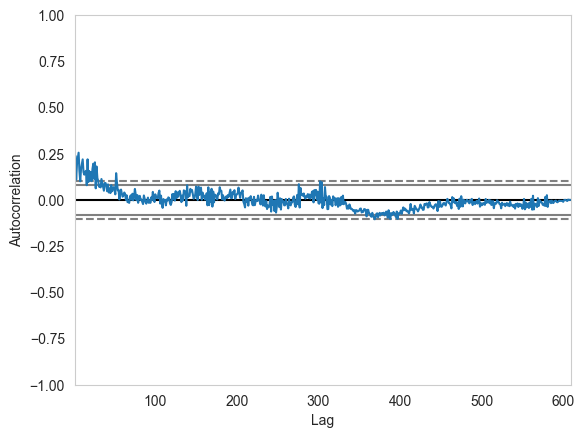

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dfSTventasPorDia.udsVenta)
plt.show()

En los primeros lags (hasta aproximadamente 30), la autocorrelación es positiva y significativa, con valores cercanos a 0.25. Las líneas horizontales punteadas representan el intervalo de confianza (aprox. 95%).
Cuando la curva está dentro de estas líneas, la autocorrelación no es estadísticamente significativa.
A partir de lag ≈ 50, la mayoría de los valores están dentro del intervalo, lo que indica que no hay correlación significativa más allá de unas pocas semanas.

### Serie estacionaria o Random Walk?

Comprobar si la serie es estacionaria

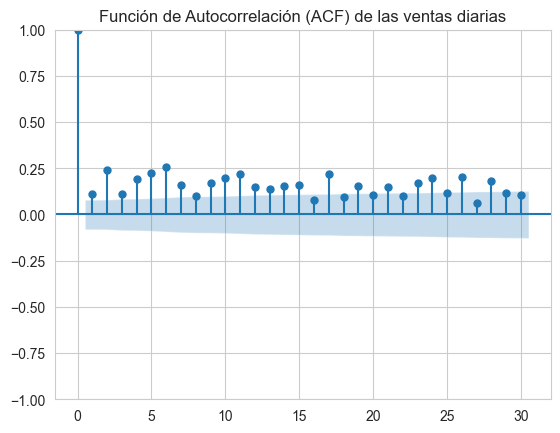

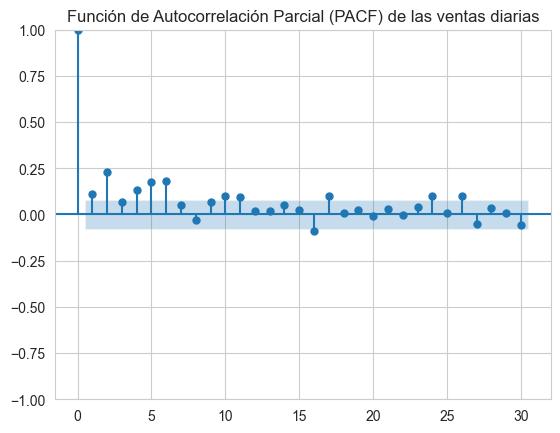

ADF Statistic: -3.1005752723783946
p-value: 0.026510645033909857
Critical Values:
   1%: -3.441444394224128
   5%: -2.8664345376276454
   10%: -2.569376663737217
La serie es estacionaria (rechazamos H0)


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

plot_acf(dfSTventasPorDia.udsVenta, lags=30)
plt.title('Función de Autocorrelación (ACF) de las ventas diarias')
plt.show()

plot_pacf(dfSTventasPorDia.udsVenta, lags=30, method='ywm')
plt.title('Función de Autocorrelación Parcial (PACF) de las ventas diarias')
plt.show()

result = adfuller(dfSTventasPorDia.udsVenta)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')
if result[1] <= 0.05:
    print("La serie es estacionaria (rechazamos H0)")
else:
    print("La serie no es estacionaria (no rechazamos H0)")

La serie es estacionaria y tiene autocorrelación por lo que se ve en la gráficas con lo que no es random walk y se pueden utilizar métodos de ML o de modelos estadísticos:

Como p < 0.05 y el estadístico ADF es menor que el valor crítico al 5% (−2.8664), rechazamos la H₀ al 5%

Los gráficos ACF/PACF son coherentes con una serie estacionaria: la ACF no muestra una caída extremadamente lenta hacia cero (no hay una cola larga típica de una raíz unitaria clara) y la PACF muestra picos en los primeros retardos y luego se atenua — esto es típico de un proceso AR(p) estacionario.